# Import packages and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
import math
import re
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
import pandas.core.algorithms as algos
pd.pandas.set_option('display.max_columns',None)

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Fake News Classifier/train.csv')

In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train.shape

(20800, 5)

In [ ]:
features=[i for i  in train.columns if i not in ['label']]

In [ ]:
features

['id', 'title', 'author', 'text']

In [ ]:
train.shape

(20800, 5)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# Handling Missing Values

In [ ]:
train.fillna('unavailable',inplace=True)

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Fake News Classifier/test.csv')

In [ ]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
test.fillna('unavailable',inplace=True)

In [ ]:
df=pd.concat([train,test],axis='rows')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      26000 non-null  int64  
 1   title   26000 non-null  object 
 2   author  26000 non-null  object 
 3   text    26000 non-null  object 
 4   label   20800 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df['comb']=df['title']+df['author']+df['text']      # Combined all the features 

# clean text data

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
wordnet=WordNetLemmatizer()
def remove_punct(text):
  # text="".join([char for char in text if char not in string.punctuation])
  text="".join([re.sub('[^a-zA-Z]',' ',char) for char in text ])
  text=text.lower()
  text=text.split()
  # text=[wordnet.lemmatize(word) for word in text if word not in set(stopwords.words("english"))]
  text=" ".join(text)
  return text

In [ ]:
df['comb']=df['comb'].apply(remove_punct)

In [ ]:
df.head()

,id,title,author,text,label,comb
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0,house dem aide we didn t even see comey s lett...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0,flynn hillary clinton big woman on campus brei...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0,why the truth might get you firedconsortiumnew...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0,civilians killed in single us airstrike have b...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0,iranian woman jailed for fictional unpublished...


# Word Embedding

In [ ]:
# !pip install tensorflow

     |████████████████████████████████| 462 kB 8.8 MB/s 


In [ ]:
import tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

In [ ]:
voc_size=10000   # Vocabulary size

In [ ]:
title=df['title']
title[0]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
0    Specter of Trump Loosens Tongues, if Not Purse...
Name: title, dtype: object

In [ ]:
one_hot_r=[one_hot(words, voc_size) for words in title]

In [ ]:
one_hot_r[0:2]

[[7111,
  7775,
  8359,
  2412,
  6037,
  1213,
  3513,
  2082,
  6315,
  1870,
  8040,
  5400,
  566,
  181],
 [8415, 676, 5960, 5950, 1103, 6160, 1618, 1148]]

In [ ]:
# embed 
sent_len=30
embedded_docs=pad_sequences(one_hot_r,padding='post',maxlen=sent_len)

In [ ]:
embedded_docs[:10]

array([[7111, 7775, 8359, 2412, 6037, 1213, 3513, 2082, 6315, 1870, 8040,
        5400,  566,  181,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [8415,  676, 5960, 5950, 1103, 6160, 1618, 1148,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [3107, 6936, 2627, 8170, 8908,  626, 4286,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [9984, 5306, 6298, 7582,  270, 3624, 8440,  168, 2984, 5663,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [8482, 1103, 8680, 8036,  243, 3035, 1194, 4257, 1103, 7564, 1046,
        2068, 8036, 8595,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 

# Model

In [ ]:
sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6,momentum=0.9, nesterov=True)

In [ ]:
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
# model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(100)))  # used Bidirectional LSTM
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 30, 50)            500000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 621,001
Trainable params: 621,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs)

26000

In [ ]:
X=embedded_docs[:train.shape[0]]
y=df['label'][:train.shape[0]]
x_test=embedded_docs[train.shape[0]:]

# Split data for training and testing

In [ ]:
X_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train,y_train,validation_data=(x_valid,y_valid),epochs=25,batch_size=124)

Epoch 1/25
135/135 [==============================] - 29s 147ms/step - loss: 0.6916 - accuracy: 0.5333 - val_loss: 0.6890 - val_accuracy: 0.5849
Epoch 2/25
135/135 [==============================] - 16s 119ms/step - loss: 0.6830 - accuracy: 0.6123 - val_loss: 0.6674 - val_accuracy: 0.6353
Epoch 3/25
135/135 [==============================] - 16s 120ms/step - loss: 0.6280 - accuracy: 0.6661 - val_loss: 0.5773 - val_accuracy: 0.7099
Epoch 4/25
135/135 [==============================] - 16s 120ms/step - loss: 0.5065 - accuracy: 0.7528 - val_loss: 0.3652 - val_accuracy: 0.8149
Epoch 5/25
135/135 [==============================] - 16s 119ms/step - loss: 0.3584 - accuracy: 0.8539 - val_loss: 0.3522 - val_accuracy: 0.8255
Epoch 6/25
135/135 [==============================] - 17s 127ms/step - loss: 0.2590 - accuracy: 0.9017 - val_loss: 0.2554 - val_accuracy: 0.9041
Epoch 7/25
135/135 [==============================] - 17s 125ms/step - loss: 0.2297 - accuracy: 0.9097 - val_loss: 0.2201 - val_ac

In [ ]:
y_pred_prob=np.array(model.predict(X_train))[:,0]
y_pred_valid=np.array(model.predict(x_valid))[:,0]
y_pred=np.array(model.predict(x_test))[:,0]

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_valid, y_pred_valid)

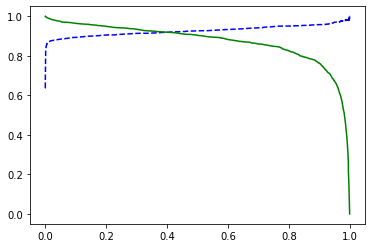

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
[...]
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Decision boundary to identify classes

In [ ]:
def cutoff_youdens_j(fpr,tpr,thresholds):
  a = tpr-fpr
  b = sorted(zip(a,thresholds))
  return b[-1][1] 

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_valid)

In [ ]:
cutoff = cutoff_youdens_j(fpr, tpr, threshold)

In [ ]:
predicted = pd.DataFrame()
predicted["label"] = y_pred_prob
predicted["label"] = np.where(predicted["label"] > float(cutoff), 1, 0)
predicted

pred_valid = pd.DataFrame()
pred_valid["label"] = y_pred_valid
pred_valid["label"] = np.where(pred_valid["label"] > float(cutoff), 1, 0)
pred_valid

predictions = pd.DataFrame()
predictions['label'] = y_pred
predictions['label'] = np.where(predictions['label'] > float(cutoff), 1, 0)
predictions

,label
0,0
1,1
2,1
3,0
4,1
...,...
5195,0
5196,0
5197,0
5198,1


In [ ]:
from sklearn.metrics import roc_auc_score

# Performance on Train Data

In [ ]:
conf_matrix = metrics.confusion_matrix(y_train, predicted)
print(conf_matrix)
acc_train = metrics.accuracy_score(y_train, predicted)
print(acc_train)
precision_train = metrics.precision_score(y_train, predicted)
print(precision_train)
sensitivity_train = metrics.recall_score(y_train, predicted)
print(sensitivity_train)
specificity_train = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
print(specificity_train)
roc_auc_score(y_train, predicted)

[[7928  327]
 [  29 8356]]
0.9786057692307693
0.9623402049982724
0.9965414430530709
0.9603876438522108


0.9784645434526408

# Performance on Validation set Data

In [ ]:
conf_matrix = metrics.confusion_matrix(y_valid, pred_valid)
print(conf_matrix)

acc_train = metrics.accuracy_score(y_valid, pred_valid)
print(acc_train)
precision_train = metrics.precision_score(y_valid, pred_valid)
print(precision_train)
sensitivity_train = metrics.recall_score(y_valid, pred_valid)
print(sensitivity_train)
specificity_train = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
print(specificity_train)
roc_auc_score(y_valid, pred_valid)

[[1914  218]
 [  83 1945]]
0.9276442307692307
0.8992140545538604
0.9590729783037475
0.8977485928705441


0.9284107855871457

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_train, predicted,average='macro'))
f1_score(y_valid, pred_valid,average='macro')

0.9785916059134675


0.9276402125464738

In [ ]:
submit=pd.read_csv('/content/drive/MyDrive/Fake News Classifier/submit.csv')

In [ ]:
submit.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [ ]:
submit['label']=predictions['label']

In [ ]:
submit.to_csv('sub5',index=False)